In [18]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ayushv322/animal-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animal-classification


In [34]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animal-image-dataset-90-different-animals


In [40]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("likhon148/animal-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animal-data


In [45]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("antobenedetti/animals")

print("Path to dataset files:", path)

Mounting files to /kaggle/input/animals...
Path to dataset files: /kaggle/input/animals


In [390]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers, models
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, Dropout
from keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
sns.set()

In [19]:
os.listdir('/kaggle/input/animal-classification')

['Data']

In [20]:
os.listdir('/kaggle/input/animal-classification/Data')

['Buffalo', 'Elephant', 'Zebra', 'Rhino']

In [30]:
def data_extractor(path):
    images = []
    for i in os.listdir(path):
        for j in os.listdir(os.path.join(path, i)):
            path_m = os.path.join(path, i, j)
            img = cv2.imread(path_m)
            if img is None:
                print(path_m)
            else:
                resized_img = cv2.resize(img, (80, 80))
                images.append(resized_img)
    return images

In [31]:
train_images = data_extractor('/kaggle/input/animal-classification/Data')

In [33]:
print(f'Size of train set: {len(train_images)}')

Size of train set: 4000


In [35]:
os.listdir('/kaggle/input/animal-image-dataset-90-different-animals')

['animals', 'name of the animals.txt']

In [36]:
os.listdir('/kaggle/input/animal-image-dataset-90-different-animals/animals')

['animals']

In [37]:
os.listdir('/kaggle/input/animal-image-dataset-90-different-animals/animals/animals')

['beetle',
 'parrot',
 'fox',
 'wolf',
 'hedgehog',
 'turtle',
 'snake',
 'shark',
 'horse',
 'antelope',
 'hamster',
 'woodpecker',
 'eagle',
 'chimpanzee',
 'bison',
 'penguin',
 'butterfly',
 'sandpiper',
 'hornbill',
 'lion',
 'lobster',
 'oyster',
 'otter',
 'grasshopper',
 'raccoon',
 'dog',
 'pigeon',
 'donkey',
 'hippopotamus',
 'hummingbird',
 'bear',
 'coyote',
 'bee',
 'pig',
 'rat',
 'owl',
 'caterpillar',
 'koala',
 'squid',
 'hare',
 'whale',
 'mouse',
 'tiger',
 'fly',
 'lizard',
 'orangutan',
 'bat',
 'porcupine',
 'kangaroo',
 'gorilla',
 'starfish',
 'mosquito',
 'crow',
 'possum',
 'goldfish',
 'swan',
 'elephant',
 'sheep',
 'dragonfly',
 'zebra',
 'seal',
 'octopus',
 'cow',
 'ox',
 'wombat',
 'reindeer',
 'panda',
 'duck',
 'goose',
 'goat',
 'badger',
 'flamingo',
 'crab',
 'seahorse',
 'rhinoceros',
 'dolphin',
 'okapi',
 'moth',
 'sparrow',
 'pelecaniformes',
 'squirrel',
 'leopard',
 'jellyfish',
 'ladybugs',
 'cockroach',
 'hyena',
 'cat',
 'deer',
 'turkey',

In [38]:
train_images2 = data_extractor('/kaggle/input/animal-image-dataset-90-different-animals/animals/animals')

In [39]:
print(f'Size of train images 2: {len(train_images2)}')

Size of train images 2: 5400


In [41]:
os.listdir('/kaggle/input/animal-data')

['animal_data']

In [42]:
os.listdir('/kaggle/input/animal-data/animal_data')

['Horse',
 'Lion',
 'Dog',
 'Bear',
 'Bird',
 'Tiger',
 'Kangaroo',
 'Elephant',
 'Zebra',
 'Cow',
 'Panda',
 'Giraffe',
 'Dolphin',
 'Cat',
 'Deer']

In [43]:
train_images3 = data_extractor('/kaggle/input/animal-data/animal_data')

In [44]:
print(f'Size of train images3: {len(train_images3)}')

Size of train images3: 1944


In [46]:
os.listdir('/kaggle/input/animals')

['animals']

In [48]:
os.listdir('/kaggle/input/animals/animals/train')

['horse', 'lion', 'dog', 'elephant', 'cat']

In [49]:
train_images4 = data_extractor('/kaggle/input/animals/animals/train')

In [50]:
print(f'Size of train_images 4: {len(train_images4)}')

Size of train_images 4: 13474


In [51]:
train_images5 = data_extractor('/kaggle/input/animals/animals/val')

In [52]:
print(f'Size of train images 5: {len(train_images5)}')

Size of train images 5: 1497


In [53]:
train_data = train_images + train_images2 + train_images3 + train_images4 + train_images5

In [255]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dog-and-cat-classification-dataset


In [256]:
os.listdir('/kaggle/input/dog-and-cat-classification-dataset')

['PetImages']

In [257]:
os.listdir('/kaggle/input/dog-and-cat-classification-dataset/PetImages')

['Dog', 'Cat']

In [258]:
train_data = data_extractor('/kaggle/input/dog-and-cat-classification-dataset/PetImages')

/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/6059.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/11849.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/3288.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/6238.jpg


Corrupt JPEG data: 226 extraneous bytes before marker 0xd9


/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/2688.jpg


Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/7112.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/8730.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/7133.jpg


/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/11853.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/7969.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/7459.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/10747.jpg


Corrupt JPEG data: 254 extraneous bytes before marker 0xd9


/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/6718.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/2877.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/3136.jpg


Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9


/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/11675.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/4367.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/5604.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/9188.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/3588.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/11410.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/1308.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/10158.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/2384.jpg


Corrupt JPEG data: 399 extraneous bytes before marker 0xd9


/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/1866.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/7369.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/10797.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/10401.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog/5736.jpg


Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/4833.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/850.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/8470.jpg


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/11210.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/660.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/140.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/10820.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/10501.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/9171.jpg


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/9778.jpg


Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/2663.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/11935.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/10125.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/11874.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/936.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/5553.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/7978.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/3491.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/3300.jpg


Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/7968.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/11565.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/10404.jpg
/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat/9565.jpg


In [259]:
train_data = shuffle(train_data, random_state = 101)

In [260]:
print(f'Size of unlabeled data: {len(train_data)}')

Size of unlabeled data: 24946


In [261]:
train_data_np = np.array(train_data)

In [262]:
train_data_scaled = train_data_np / 255

In [263]:
train_ds, valid_ds = train_test_split(train_data_scaled, test_size = 0.1, random_state = 101)

In [264]:
print(f'Size of unlabeled training set: {len(train_ds)}')
print(f'Size of unlabeled validation set: {len(valid_ds)}')

Size of unlabeled training set: 22451
Size of unlabeled validation set: 2495


In [265]:
def data_preparation(data):
    data2 = tf.data.Dataset.from_tensor_slices(data)
    return data2.map(lambda x: (x, x)).batch(32)

In [266]:
train_dataset = data_preparation(train_ds)

In [267]:
valid_dataset = data_preparation(valid_ds)

In [268]:
inputs = tf.keras.Input(shape = (80, 80, 3))
x = layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu')(x)
encoded = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu')(x)
x = layers.UpSampling2D((2, 2))(x)
outputs = layers.Conv2D(3, (3, 3), padding = 'same', activation = 'relu')(x)

In [269]:
autoencoder = tf.keras.Model(inputs, outputs)

In [270]:
autoencoder.compile(
    optimizer = 'adam',
    loss = 'mse'
)

In [271]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5)

In [272]:
history = autoencoder.fit(train_dataset, validation_data = valid_dataset, epochs = 100, callbacks = [early_stopping])

Epoch 1/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - loss: 0.0260 - val_loss: 0.0079
Epoch 2/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 0.0078 - val_loss: 0.0066
Epoch 3/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0064 - val_loss: 0.0060
Epoch 4/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0060 - val_loss: 0.0056
Epoch 5/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 6/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0054 - val_loss: 0.0053
Epoch 7/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0053 - val_loss: 0.0051
Epoch 8/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 9/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 10/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 11/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0047 - val_loss: 0.0050
Epoch 12/100
702/70

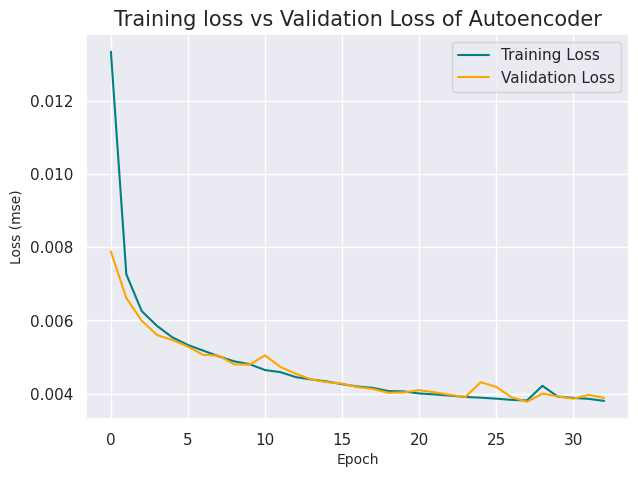

In [273]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training loss vs Validation Loss of Autoencoder', fontsize = 15)
plt.xlabel('Epoch', fontsize = 10)
plt.ylabel('Loss (mse)', fontsize = 10)
plt.legend()
plt.show()

In [321]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hassanaitnacer/dogs-vs-cats")

print("Path to dataset files:", path)

Mounting files to /kaggle/input/dogs-vs-cats...
Path to dataset files: /kaggle/input/dogs-vs-cats


In [322]:
os.listdir('/kaggle/input/dogs-vs-cats')

['unseen-dog.jpg', 'dogs-vs-cats', 'unseen-cat.jpeg']

In [323]:
os.listdir('/kaggle/input/dogs-vs-cats/dogs-vs-cats')

['dog', 'cat']

In [324]:
images, labels = [], []
for i in os.listdir('/kaggle/input/dogs-vs-cats/dogs-vs-cats'):
    for j in os.listdir(os.path.join('/kaggle/input/dogs-vs-cats/dogs-vs-cats', i)):
        path = os.path.join('/kaggle/input/dogs-vs-cats/dogs-vs-cats', i, j)
        img = cv2.imread(path)
        if img is None:
            print(path)
        else:
            resized_img = cv2.resize(img, (80, 80))
            images.append(resized_img)
            labels.append(i)

In [325]:
images_np = np.array(images)

In [326]:
X = images_np / 255

In [327]:
le = LabelEncoder()

In [328]:
y = le.fit_transform(labels)

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [330]:
encoder = models.Model(inputs, encoded)

In [331]:
for layer in encoder.layers:
    layer.trainable = False

In [366]:
x = layers.Flatten()(encoder.output)
x = layers.Dense(256, activation = 'relu')(x)
x = layers.Dense(128, activation = 'relu')(x)
x = layers.Dense(128, activation = 'relu')(x)
x = layers.Dense(128, activation = 'relu')(x)
output_clf = layers.Dense(1, activation = 'sigmoid')(x)

In [367]:
classifier = tf.keras.Model(encoder.input, output_clf)

In [368]:
classifier.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [369]:
early_stopping2 = EarlyStopping(monitor = 'val_loss', patience = 2)

In [370]:
history2 = classifier.fit(X_train, y_train, validation_split = 0.1, epochs = 100, callbacks = [early_stopping2])

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5805 - loss: 0.6709 - val_accuracy: 0.7000 - val_loss: 0.5681
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7096 - loss: 0.5507 - val_accuracy: 0.6988 - val_loss: 0.6034
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7704 - loss: 0.4757 - val_accuracy: 0.7713 - val_loss: 0.4645
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8026 - loss: 0.4298 - val_accuracy: 0.7700 - val_loss: 0.4792
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8014 - loss: 0.4331 - val_accuracy: 0.7700 - val_loss: 0.4748


In [371]:
def plot_results(train_accs, train_losses, valid_accs, valid_losses):
    fig, axes = plt.subplots(1, 2, figsize = (15, 5))
    xs = np.arange(1, len(train_accs) + 1, 1)
    axes[0].plot(xs, train_accs, label = 'Train')
    axes[0].plot(xs, valid_accs, label = 'Validation')
    axes[0].set_title('Accuracy', fontsize = 15)
    axes[0].set_xlabel('Epoch', fontsize = 10)
    axes[0].set_ylabel('Accuracy', fontsize = 10)
    axes[0].set_xticks(xs)
    axes[1].plot(xs, train_losses, label = 'Train')
    axes[1].plot(xs, valid_losses, label = 'Validation')
    axes[1].set_title('Loss', fontsize = 15)
    axes[1].set_xlabel('Epoch', fontsize = 10)
    axes[1].set_ylabel('Loss', fontsize = 10)
    axes[1].set_xticks(xs)
    axes[0].legend()
    axes[1].legend()
    plt.tight_layout()
    plt.show()

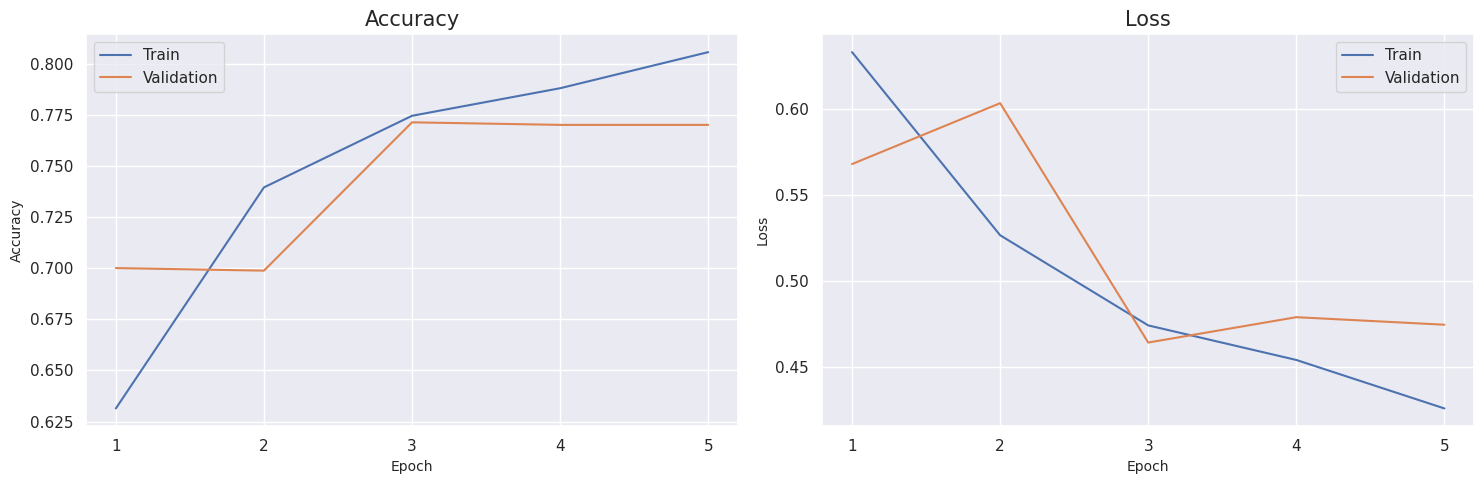

In [372]:
plot_results(history2.history['accuracy'], history2.history['loss'], history2.history['val_accuracy'], history2.history['val_loss'])

In [373]:
classifier.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7749 - loss: 0.4800


[0.49522560834884644, 0.7645000219345093]

In [376]:
model = Sequential()

In [377]:
model.add(Input(shape = (80, 80, 3)))
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [378]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [379]:
early_stopping3 = EarlyStopping(monitor = 'val_loss', patience = 2)

In [380]:
history3 = model.fit(X_train, y_train, validation_split = 0.1, epochs = 100, callbacks = [early_stopping3])

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5035 - loss: 0.6949 - val_accuracy: 0.5888 - val_loss: 0.6805
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6105 - loss: 0.6616 - val_accuracy: 0.6225 - val_loss: 0.6528
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6494 - loss: 0.6272 - val_accuracy: 0.6513 - val_loss: 0.6129
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7144 - loss: 0.5589 - val_accuracy: 0.7200 - val_loss: 0.5562
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7671 - loss: 0.4835 - val_accuracy: 0.7600 - val_loss: 0.5023
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7984 - loss: 0.4322 - val_accuracy: 0.7700 - val_loss: 0.5154
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8282 - loss: 0.3813 - val_accuracy: 0.7675 - val_loss: 0.5621


In [381]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7419 - loss: 0.6133


[0.6084697842597961, 0.7404999732971191]

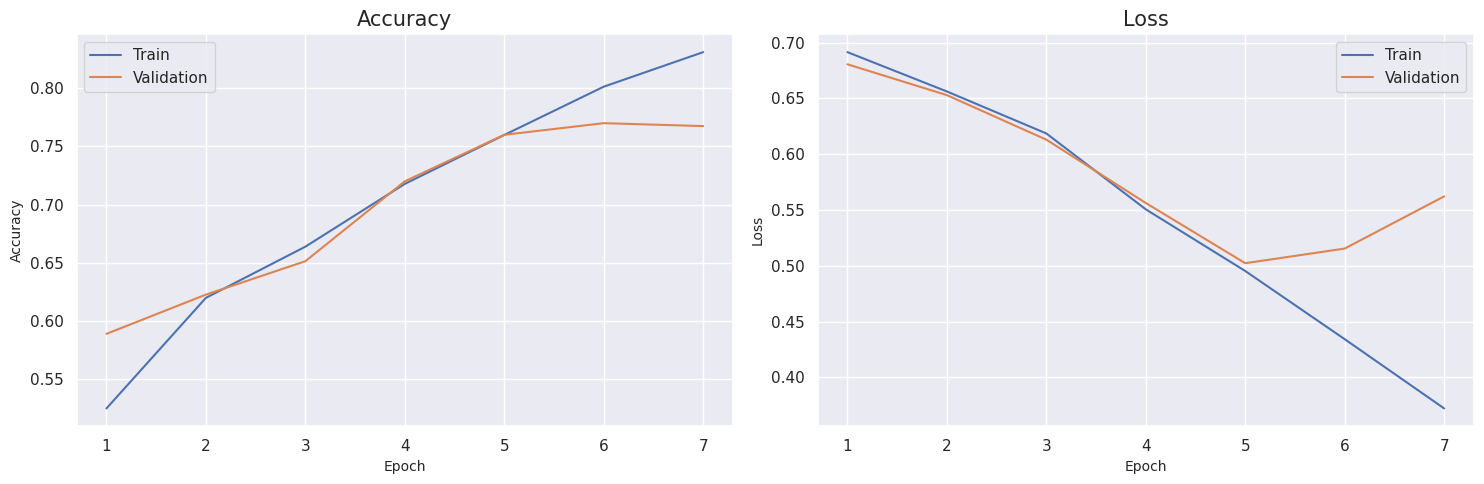

In [382]:
plot_results(history3.history['accuracy'], history3.history['loss'], history3.history['val_accuracy'], history3.history['val_loss'])

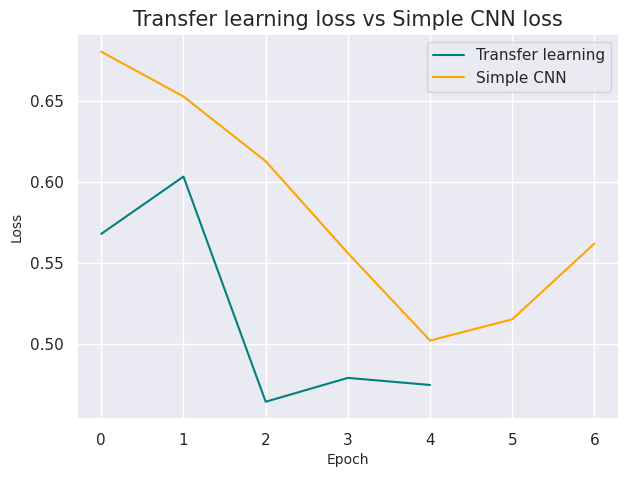

In [383]:
plt.figure(figsize = (7, 5))
plt.plot(history2.history['val_loss'], label = 'Transfer learning', color = 'teal')
plt.plot(history3.history['val_loss'], label = 'Simple CNN', color = 'orange')
plt.title('Transfer learning loss vs Simple CNN loss', fontsize = 15)
plt.xlabel('Epoch', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

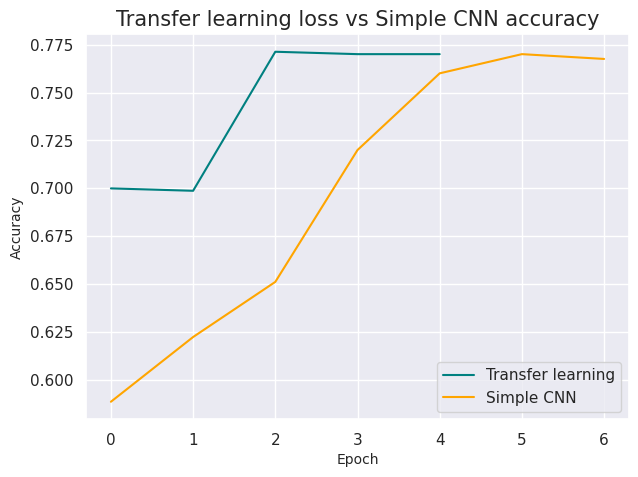

In [384]:
plt.figure(figsize = (7, 5))
plt.plot(history2.history['val_accuracy'], label = 'Transfer learning', color = 'teal')
plt.plot(history3.history['val_accuracy'], label = 'Simple CNN', color = 'orange')
plt.title('Transfer learning loss vs Simple CNN accuracy', fontsize = 15)
plt.xlabel('Epoch', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

In [385]:
y_p1 = classifier.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [387]:
y_pred1 = np.where(y_p1 > 0.5, 1, 0)

In [388]:
y_p2 = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [389]:
y_pred2 = np.where(y_p2 > 0.5, 1, 0)

In [391]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78      1007
           1       0.79      0.72      0.75       993

    accuracy                           0.76      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.77      0.76      0.76      2000



In [392]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.65      0.72      1007
           1       0.70      0.83      0.76       993

    accuracy                           0.74      2000
   macro avg       0.75      0.74      0.74      2000
weighted avg       0.75      0.74      0.74      2000



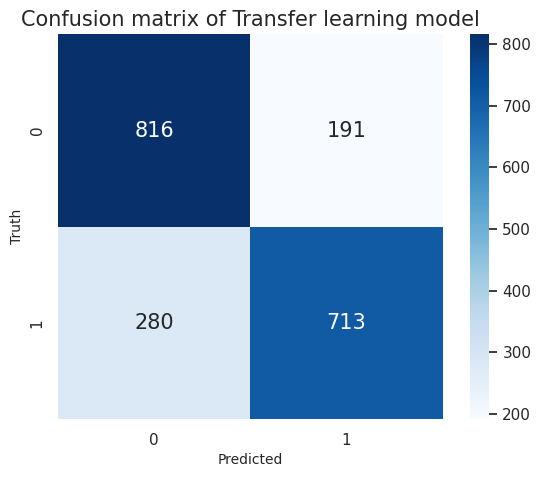

In [393]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred1), annot = True, square = True, cbar = True, annot_kws = {'size': 15}, fmt = 'd', cmap = 'Blues')
plt.title('Confusion matrix of Transfer learning model', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

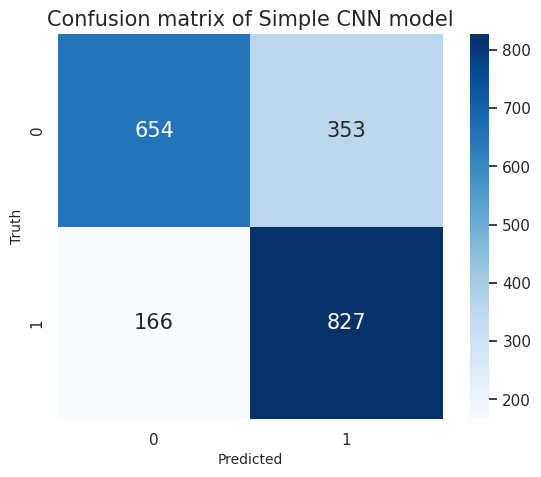

In [394]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot = True, square = True, cbar = True, annot_kws = {'size': 15}, fmt = 'd', cmap = 'Blues')
plt.title('Confusion matrix of Simple CNN model', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

In [400]:
im = cv2.imread('/kaggle/input/dogimage/ss.jpg')

In [401]:
r_im = cv2.resize(im, (80, 80))

In [403]:
im = np.expand_dims(r_im, axis = 0)

In [404]:
im = im / 255

In [406]:
im.shape

(1, 80, 80, 3)

In [407]:
rec_im = autoencoder.predict(im)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 996ms/step


In [408]:
rec_im = rec_im[0]

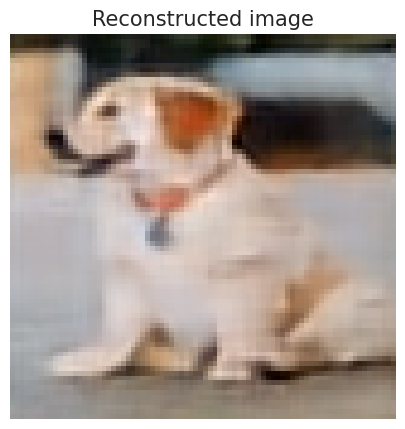

In [414]:
plt.figure(figsize = (7, 5))
img_rgb = cv2.cvtColor(rec_im, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Reconstructed image', fontsize = 15)
plt.axis('off')
plt.show()

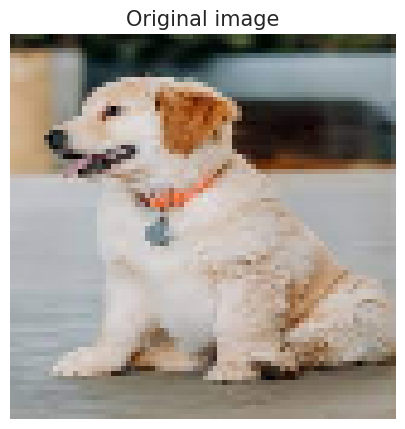

In [418]:
plt.figure(figsize = (7, 5))
img_rgb = cv2.cvtColor(r_im, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Original image', fontsize = 15)
plt.axis('off')
plt.show()

In [421]:
encoder_layer_name = 'max_pooling2d_14'

In [422]:
encoder_layer = autoencoder.get_layer(encoder_layer_name)

In [425]:
encoder_output_model = models.Model(inputs=autoencoder.input, outputs=encoder_layer.output)

In [426]:
encoder_output = encoder_output_model.predict(im)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


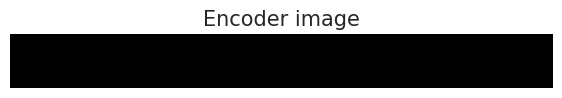

In [429]:
plt.figure(figsize = (7, 5))
img_rgb = cv2.cvtColor(encoder_output, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Encoder image', fontsize = 15)
plt.axis('off')
plt.show()

In [430]:
encoder_output.shape

(1, 10, 10, 128)